<a href="https://colab.research.google.com/github/Samirdanish55/FitClub-Starter/blob/master/Customer_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER SALES ANALYSIS **PROJECT**

COMMON SETUP (USED ALL DAYS)**bold text**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", None)


DAY 1: Data Loading & **Exploration**

In [28]:
# Load datasets
sales_df = pd.read_csv("/content/sales_data.csv")
customers_df = pd.read_csv("/content/customer_churn.csv")

# Standardize column names
sales_df.columns = sales_df.columns.str.strip().str.lower().str.replace(" ", "_")
customers_df.columns = customers_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Explore structure
print("Sales Data Info")
sales_df.info()

print("\nCustomer Data Info")
customers_df.info()

# Check missing values
print("\nMissing Values - Sales")
print(sales_df.isnull().sum())

print("\nMissing Values - Customers")
print(customers_df.isnull().sum())


Sales Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         100 non-null    object
 1   product      100 non-null    object
 2   quantity     100 non-null    int64 
 3   price        100 non-null    int64 
 4   customer_id  100 non-null    object
 5   region       100 non-null    object
 6   total_sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB

Customer Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        500 non-null    object
 1   tenure            500 non-null    int64 
 2   monthlycharges    500 non-null    int64 
 3   totalcharges      500 non-null    int64 
 4   contract          500 non-null    object
 5   paymentmeth

DAY 2: Data Cleaning & **Preparation**

In [29]:
# Identify key columns automatically
date_col = [c for c in sales_df.columns if "date" in c][0]
customer_id_col = [c for c in sales_df.columns if "customer" in c and "id" in c][0]
product_col = [c for c in sales_df.columns if "product" in c][0]
quantity_col = [c for c in sales_df.columns if "quantity" in c or "qty" in c][0]
price_col = [c for c in sales_df.columns if "price" in c or "amount" in c][0]

# Convert date
sales_df[date_col] = pd.to_datetime(sales_df[date_col], errors="coerce")

# Handle missing values
sales_df[quantity_col].fillna(0, inplace=True)
sales_df[price_col].fillna(sales_df[price_col].median(), inplace=True)

# Create calculated column
sales_df["total_amount"] = sales_df[quantity_col] * sales_df[price_col]

# Extract date parts
sales_df["year"] = sales_df[date_col].dt.year
sales_df["month"] = sales_df[date_col].dt.month
sales_df["month_name"] = sales_df[date_col].dt.month_name()


/tmp/ipython-input-373128911.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df[quantity_col].fillna(0, inplace=True)
/tmp/ipython-input-373128911.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

DAY 3: Customer **Analysis**

In [30]:
# Identify customer id in customer dataset
cust_id_customer = [
    c for c in customers_df.columns if ("customer" in c or "cust" in c) and "id" in c
][0]

# Rename to match sales
customers_df.rename(columns={cust_id_customer: customer_id_col}, inplace=True)

# Merge datasets
merged_df = pd.merge(
    sales_df,
    customers_df,
    on=customer_id_col,
    how="left"
)

# Customer Lifetime Value
customer_ltv = (
    merged_df.groupby(customer_id_col)["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

# Regional Distribution
if "region" in merged_df.columns:
    regional_sales = merged_df.groupby("region")["total_amount"].sum()



DAY 4: Sales Pattern **Analysis**

In [31]:
# Monthly sales
monthly_sales = merged_df.groupby("month_name")["total_amount"].sum()

# Best-selling products
top_products = (
    merged_df.groupby(product_col)[quantity_col]
    .sum()
    .sort_values(ascending=False)
)



DAY 5: Advanced **Analysis**

In [32]:
# Pivot Table
pivot_table = pd.pivot_table(
    merged_df,
    values="total_amount",
    index="region" if "region" in merged_df.columns else customer_id_col,
    columns=product_col,
    aggfunc="sum",
    fill_value=0
)

# Retention Rate
orders_per_customer = merged_df.groupby(customer_id_col).size()
repeat_customers = (orders_per_customer > 1).sum()
total_customers = orders_per_customer.count()
retention_rate = (repeat_customers / total_customers) * 100


DAY 6: Dashboard **Creation**

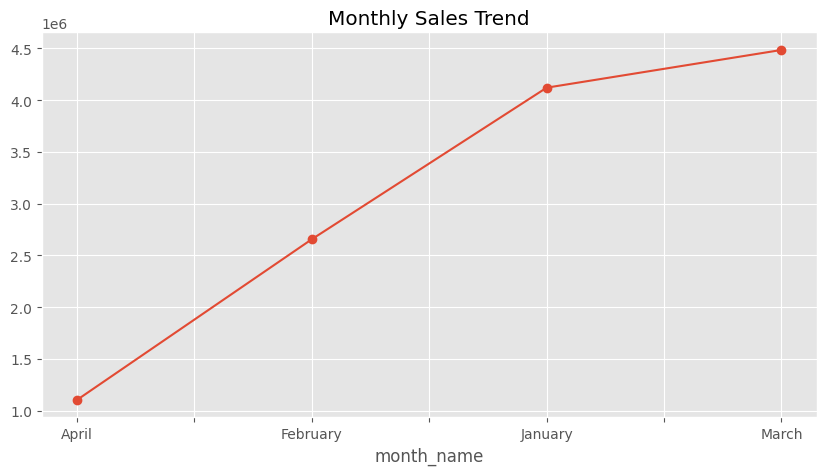

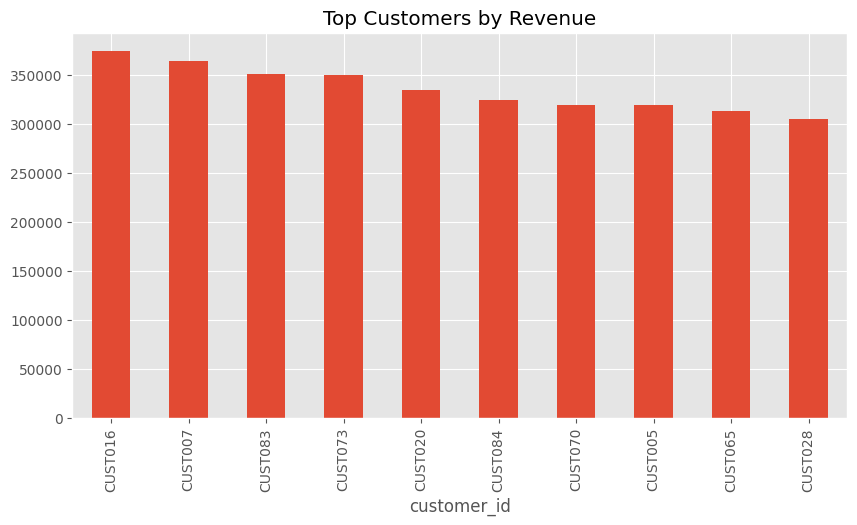

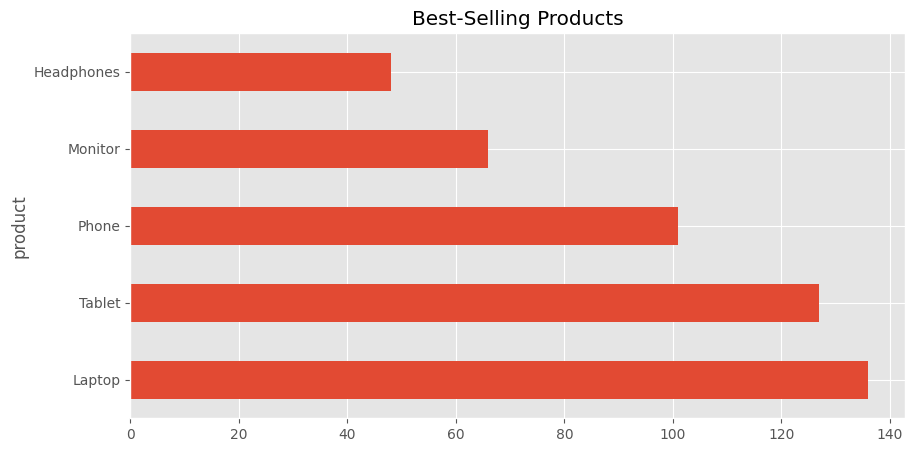

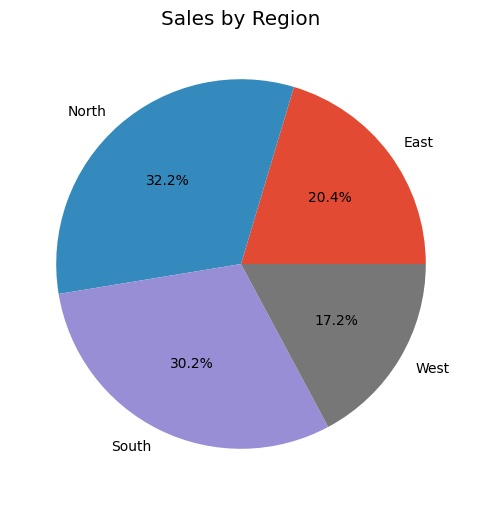

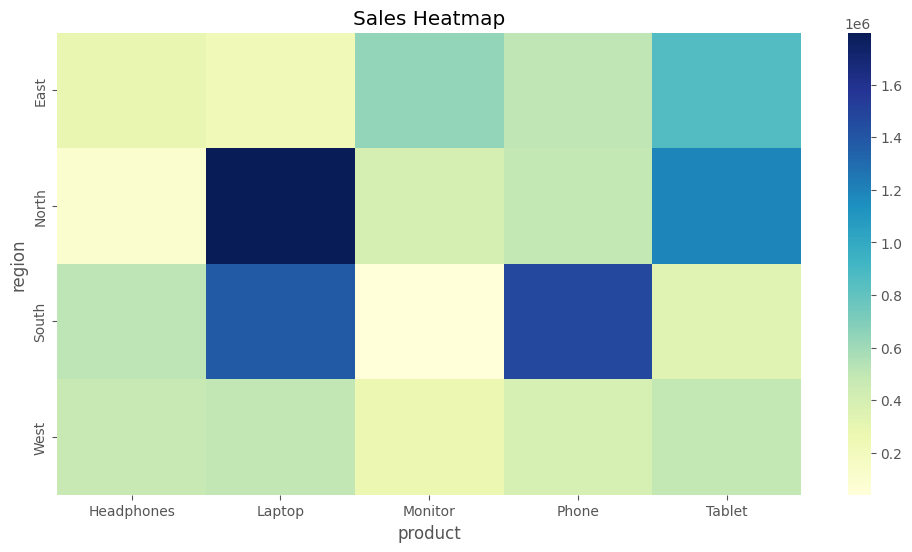

In [33]:
# Monthly Trend
monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()

# Top Customers
customer_ltv.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top Customers by Revenue")
plt.show()

# Top Products
top_products.head(10).plot(kind="barh", figsize=(10,5))
plt.title("Best-Selling Products")
plt.show()

# Regional Sales
if "region" in merged_df.columns:
    regional_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
    plt.title("Sales by Region")
    plt.ylabel("")
    plt.show()

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Sales Heatmap")
plt.show()


DAY 7: Report & **Insights**

In [34]:
total_revenue = merged_df["total_amount"].sum()
avg_order_value = merged_df["total_amount"].mean()

print("CUSTOMER SALES ANALYSIS REPORT")
print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ${avg_order_value:,.0f}")
print(f"Retention Rate: {retention_rate:.2f}%")
print(f"Top Customer ID: {customer_ltv.idxmax()}")


CUSTOMER SALES ANALYSIS REPORT
Total Revenue: $12,365,048
Total Customers: 100
Average Order Value: $123,650
Retention Rate: 0.00%
Top Customer ID: CUST016
